In [1]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import autopep8
import datetime
import numpy as np
import scipy.stats as stats

# Import quarterly data

Importing the data that was exported from the data cleaning notebook.

In [2]:
WA_quarterly_df = pd.read_csv('../Project 1.2 Processed Data/Construction_WA_Quarterly.csv')
WA_quarterly_df = WA_quarterly_df.rename(columns={'Unnamed: 0': ''})
WA_quarterly_df = WA_quarterly_df.set_index('')
WA_quarterly_df

,dwellings,townhouses,apartments,dwellings_$'000,townhouses_$'000,apartments_$'000,total_permits,total_value
,,,,,,,,
2018Q4,3068,240,247,910726,56850,84852,3555,1052428
2019Q1,2821,299,815,824553,69611,218410,3935,1112574
2019Q2,2996,343,526,878667,74793,171036,3865,1124496
2019Q3,2770,265,799,826658,66966,294430,3834,1188054
2019Q4,2897,268,336,877361,67937,119569,3501,1064867
2020Q1,2718,220,293,830906,53003,89497,3231,973406
2020Q2,2878,196,676,851247,52387,208546,3750,1112180


In [3]:
AU_df = pd.read_csv('../Project 1.2 Processed Data/Construction_AU_Quarterly.csv')
AU_df = AU_df.rename(columns={'Unnamed: 0': ''})
AU_df = AU_df.set_index('')
AU_df

,permits_au,value_au
,,
2018Q4,46181,15107274
2019Q1,43091,14062628
2019Q2,43681,14315655
2019Q3,42972,14390276
2019Q4,43616,14496008
2020Q1,42878,13992118
2020Q2,41943,13845277


# Visualisation

I didn't do any mean, median or mode calculations as there are just not enough data points to get a clear value. 

## Australia vs WA

Creating side by side bar graphs showing the permits issued in numbers and values comparing AU with WA. Even though the bar graph doesn't provide clear numbers due tot he differences between AU and WA, it does show that both AU and WA do not have a big variation over time.

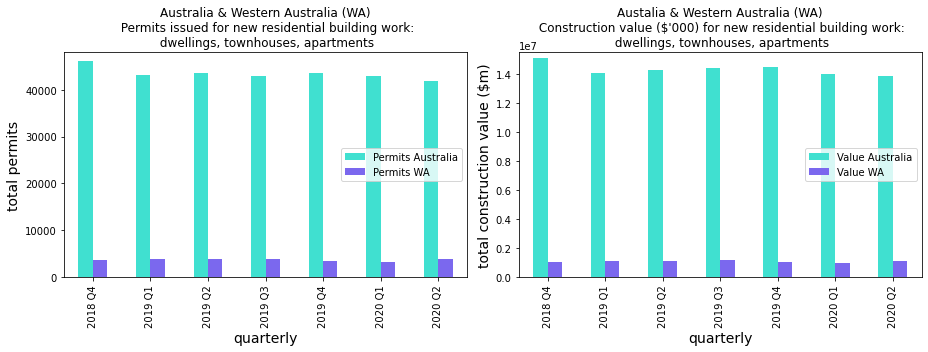

In [4]:
permits_total_df = pd.concat([AU_df['permits_au'], WA_quarterly_df['total_permits']], axis=1)
permits_total_df = permits_total_df.rename(columns={'permits_au': 'Permits Australia', 'total_permits': 'Permits WA'})

value_total_df = pd.concat([AU_df['value_au'], WA_quarterly_df['total_value']], axis=1)
value_total_df = value_total_df.rename(columns={'value_au': 'Value Australia', 'total_value': 'Value WA'})

labels = ['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

permits_total_df.plot.bar(color=['turquoise', 'mediumslateblue'], ax=ax1)
ax1.set_ylabel('total permits', fontsize=14)
ax1.set_xlabel('quarterly', fontsize=14)
ax1.set_title('Australia & Western Australia (WA)\n Permits issued for new residential building work:\n dwellings, townhouses, apartments', fontsize=12)
ax1.set_xticklabels(labels)
ax1.legend(loc=7)
ax1.set_ylim(0, 48000)

value_total_df.plot.bar(color=['turquoise', 'mediumslateblue'], ax=ax2)
ax2.set_ylabel('total construction value ($m)', fontsize=14)
ax2.set_xlabel('quarterly', fontsize=14)
ax2.set_title("Austalia & Western Australia (WA)\n Construction value ($'000) for new residential building work:\n dwellings, townhouses, apartments", fontsize=12)
ax2.set_xticklabels(labels)
ax2.legend(loc=7)
ax2.set_ylim(0, 15500000)

plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig('../Project 1.4 Final presentation data and notebooks/permits_AUvsWA_bar.png') 
plt.show()


## WA: total permits & total value per quarter

Creating a side by side pie graph to compare the quarterly periods in WA in numbers and values. The pie slices show again that there is not much variation between the quarterly periods. 

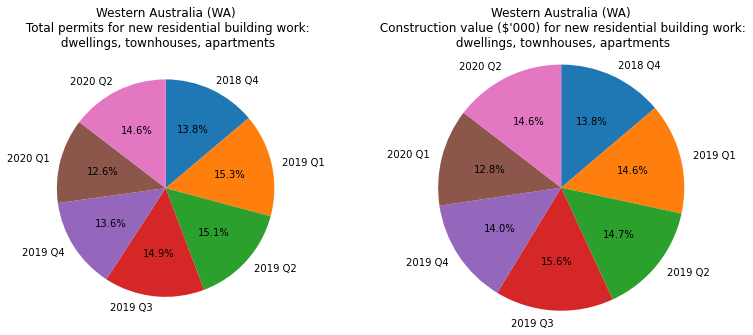

In [5]:
labels = ['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

fig, (ax2, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

WA_quarterly_df.plot.pie(y='total_value', 
        explode=(0,0,0,0,0,0,0), 
        autopct="%1.1f%%", 
        startangle=90,
        counterclock=False,
        labels=labels,
        legend=False,
        ax=ax1)
ax1.set_ylabel('')
ax1.set_title("Western Australia (WA)\n Construction value ($'000) for new residential building work:\n dwellings, townhouses, apartments", fontsize=12)

WA_quarterly_df.plot.pie(
        y='total_permits', 
        explode=(0,0,0,0,0,0,0), 
        autopct="%1.1f%%", 
        startangle=90,
        counterclock=False,
        labels=labels,
        legend=False,
        ax=ax2)
ax2.set_ylabel('')
ax2.set_title("Western Australia (WA)\n Total permits for new residential building work:\n dwellings, townhouses, apartments", fontsize=12)

plt.axis("equal")
plt.savefig('../Project 1.4 Final presentation data and notebooks/permits_WA_pie.png') 
plt.show()


## WA: types of construction

Creating a side by side line graph to show the permits issued and value for WA for the separate types of construction. It shows a very slight difference in numbers per quarter but no significant changes.

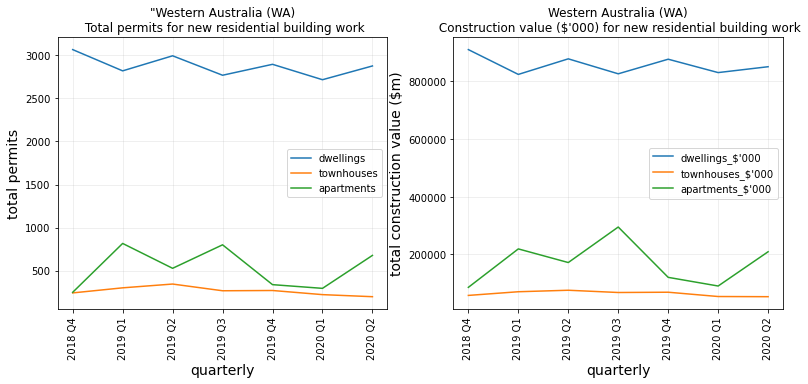

In [6]:
labels = ['2018 Q4', '2019 Q1', '2019 Q2', '2019 Q3', '2019 Q4', '2020 Q1', '2020 Q2']

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

permits_linechart_df = WA_quarterly_df.iloc[:, 0:3]
value_linechart_df = WA_quarterly_df.iloc[:, 3:6]

x = range(len(labels))

permits_linechart_df.plot(ax=ax1, grid=True)
ax1.set_title('"Western Australia (WA)\n Total permits for new residential building work', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90)
ax1.set_ylabel('total permits', fontsize=14)
ax1.set_xlabel('quarterly', fontsize=14)
ax1.grid(alpha=0.25)

value_linechart_df.plot(ax=ax2, grid=True)
ax2.set_title("Western Australia (WA)\n Construction value ($'000) for new residential building work", fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=90)
ax2.set_ylabel('total construction value ($m)', fontsize=14)
ax2.set_xlabel('quarterly', fontsize=14)
ax2.grid(alpha=0.25)

plt.savefig('../Project 1.4 Final presentation data and notebooks/permits_WA_line.png') 
plt.show()

# Correlation

I couldn't do the normal test as it requires a minimum of 8 data points and I only have 7. I also didn’t remove any outliers as there are not enough data points left. The linear regression model is limited that it is not provided to predict values but to see if a correlation exist between our several investigations. The outcome will be more reliable with more data.

## AU: number of permits vs number of real estate sales

In [7]:
national_sales_df = pd.read_csv('../Project 1.2 Processed Data/national_sales_by_quarter.csv')
national_sales_df

,Year,Quarter,Sales
0,2018,4,42926
1,2019,1,36925
2,2019,2,43152
3,2019,3,46640
4,2019,4,53665
5,2020,1,43176
6,2020,2,35159


The r-squared is: 0.07987105331653124


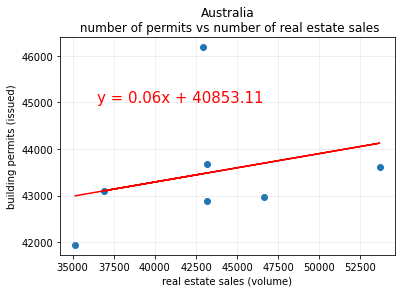

In [8]:
x_values = national_sales_df['Sales']
y_values = AU_df['permits_au']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(36500,45000),fontsize=15,color="red")
plt.xlabel('real estate sales (volume)')
plt.ylabel('building permits (issued)')
plt.title('Australia\n number of permits vs number of real estate sales')
plt.grid(alpha=0.25)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Project 1.4 Final presentation data and notebooks/realestate_permits_au.png')
plt.show()

Having a look if there is a relationship between the number of real estate sales and the number of permits issued nationally. Without having researched the reason for the outlier the correlation is positive but very weak. 

## WA: number of permits vs number of real estate sales

In [11]:
wa_sales_df = pd.read_csv('../Project 1.2 Processed Data/wa_sales_by_quarter.csv')
wa_sales_df

,Year,Quarter,Sales
0,2018,4,5365
1,2019,1,5016
2,2019,2,5317
3,2019,3,5609
4,2019,4,6176
5,2020,1,5837
6,2020,2,4082


The r-squared is: 0.2547026417198125


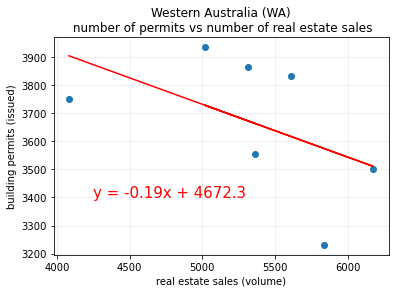

In [14]:
x_values = wa_sales_df['Sales']
y_values = WA_quarterly_df['total_permits']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4250,3400),fontsize=15,color="red")
plt.xlabel('real estate sales (volume)')
plt.ylabel('building permits (issued)')
plt.title('Western Australia (WA)\n number of permits vs number of real estate sales')
plt.grid(alpha=0.25)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Project 1.4 Final presentation data and notebooks/realestate_permits_wa.png')
plt.show()

Having a look if there is a relationship between the number of real estate sales and the number of permits issued in WA. Interestingly the relationship is the opposite of Australia wide. It's negative but weak.

## WA: number of permits vs number of grant applications

In [9]:
fhog_df = pd.read_csv('/Users/sylviabroadbent/Dropbox/Sylvia/UWA_Data_Analytics_Bootcamp/HOMEWORK/7 Project 1/Data-Analytics-Project-1/Project 1.2 Processed Data/FHOG Dataframe.csv')
fhog_df

,Date,Established Homes App,New Dwellings App,Total App,Established Homes Paid,New Dwellings Paid,Total Paid
0,2018Q4,14,1498,1512,2,1369,1371
1,2019Q1,12,1298,1310,0,1313,1313
2,2019Q2,9,1404,1413,0,1405,1405
3,2019Q3,0,1394,1394,0,1396,1396
4,2019Q4,0,1491,1491,0,1254,1254
5,2020Q1,0,1462,1462,0,1347,1347
6,2020Q2,0,1388,1388,0,1312,1312


The r-squared is: 0.5971298445529775


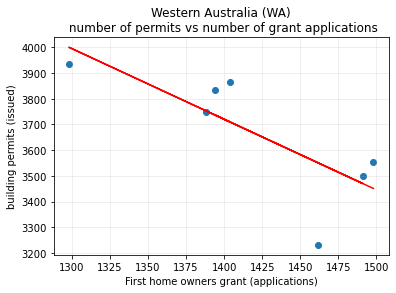

In [10]:
x_values = fhog_df['New Dwellings App']
y_values = WA_quarterly_df['total_permits']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1260,3300),fontsize=15,color="red")
plt.xlabel('First home owners grant (applications)')
plt.ylabel('building permits (issued)')
plt.title('Western Australia (WA)\n number of permits vs number of grant applications')
plt.grid(alpha=0.25)
print(f"The r-squared is: {rvalue**2}")
plt.savefig('../Project 1.4 Final presentation data and notebooks/fhog_permits.png')
plt.show()

The correlation between the home owners grant applications and the issued building permits is moderately negatively related. It does make sense that when people apply for a FHOG they will also apply for a building permit.